# General Notebook

In [1]:
seed = 123
import os
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from torchsummary import summary
import random
import torch
random.seed(seed)     # python random generator
np.random.seed(seed)  # numpy random generator

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [2]:

# Change the name to create or load the data and models
path = os.getcwd()
folder_data = r'Data\data_mlsp_semi'
#-------------------------------
if torch.cuda.is_available():  
    device = "cuda:0" 
else:  
    device = "cpu"  
print(device)

cuda:0


## Data

In [3]:
#--------------------------------------------
# 0: Vaquita girada
# 1: Cow     2: Human 
# 3: Horse   4: Camel
# 5: Dog1    6: Dog2
idx  = 4 #! Id image
p = 60 #! porcentage of missing labels  options: [40, 60, 80, 100]
names = ['bull', 'cow', 'human', 'horse', 'camel', 'dog1', 'dog2']
name_image = names[idx]+str(p)
print(name_image)

camel60


In [4]:
#!  Pay attention to idx when we read the data 
x1 = plt.imread(os.path.join(path, folder_data, 'x{}.png'.format(idx+1)))
m, n = x1.shape
y_true = plt.imread(os.path.join(path, folder_data, 'y{}.png'.format(idx+1))).reshape(m*n, 1)
y1 =  np.load(os.path.join(path, folder_data, 'y_miss_{}.npy'.format(p)))[idx].reshape(m*n, 1)
x = torch.tensor(x1.reshape(m*n, 1), dtype=torch.float32)
y = torch.tensor(y1, dtype=torch.float32)
x = x.to(device)
y = y.to(device)

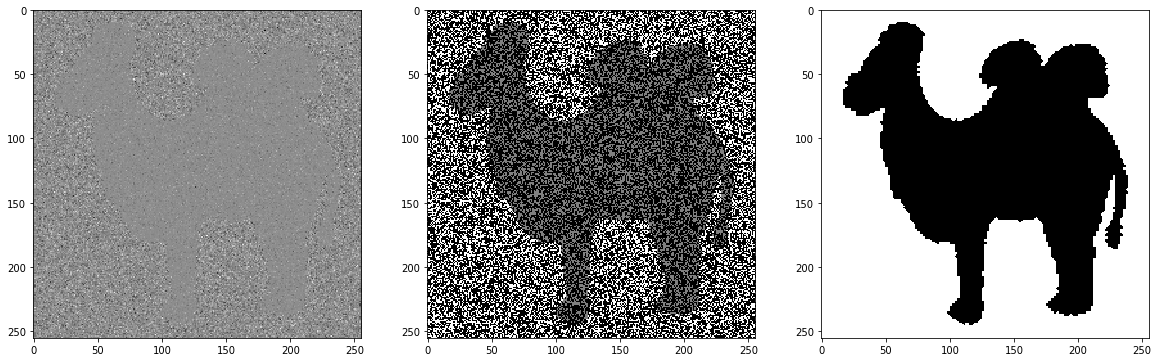

In [5]:
fig = plt.figure(figsize=(20, 30))  
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(x1, cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.imshow(y1.reshape(m,n), cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.imshow(y_true.reshape(m,n), cmap='gray')

## Functions and models

In [6]:
from models.SVRNN import SVRNN
from models.SVRNN_2 import SVRNN_2
from models.VSL import VSL
from models.TMM import TMM
from models.TMM_3 import TMM_3

from models.TMM_2 import TMM_2
from utils.training import final_model, run_model_seq, num_param, plot_loss_epoch

# Models

In [7]:
# General Parameters (we do not change the values of these parameters during the simulations)
x_dim = 1
y_dim = 1
# Parameters for the models
learning_rate = 0.005 # ! We can change this parameter but change the information in the sheet annotation
weight_decay_ = 1e-4
n_epochs = 100
clip = 10
# Parameters for printing and saving the results
#! Change this path for your own path to save the results 
print_every = 1
save_every = 2
# general_path  = os.path.join(os.getcwd(), 'Results_save_models') #! Any
# general_path = r'C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models' #! University
general_path = r"C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models" #! Home
print('Saving our model in',general_path)


Saving our model in C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models


### VLS

In [9]:
# Dimension of latent variables
z_dim = 1
# h_dim = 48# This value is not necessary for the TMM model
# num_neurons = 20 #? == h_dim?
h_dim = 14# This value is not necessary for the TMM model
num_neurons = 41 #? == h_dim?


#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = ''# '_1' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
model = VSL(x_dim, z_dim, y_dim, h_dim, num_neurons, device)

In [10]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


VSL has 5383 parameters to train
z_dim = 1, num_neurons = 41, h_dim = 14
Actual path to save our models for vsl_cow40 is 
 C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\vsl_cow40 


In [ ]:
# #* Training
# #* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

In [ ]:
# #* Training
# #* epoch_init = 1 by default
# loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

In [ ]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device=device)
# plot_loss_epoch(model, path_save,data, epoch_init)
#loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


In [ ]:
y_ = model.reconstruction(x,y).cpu().detach().numpy()

In [ ]:
# #* Reconstruction
# y_ = model.reconstruction(x,y)
# y_ = y_.cpu().detach()
y_pred_m = y_[np.where(y1 == -1)]#.numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

In [ ]:
# #* Reconstruction
# y_ = model.reconstruction(x,y)
# y_ = y_.cpu().detach()
y_pred_m = y_[np.where(y1 == -1)]#.numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

## TMM

In [21]:
# Dimension of latent variables
z_dim = 1
h_dim = 14 # This value is not necessary for the TMM model
num_neurons = 25 #? == h_dim?
add_loss = True
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = "_l{}".format(int(add_loss))
#--------------------------------------------
model = TMM_3(x_dim, z_dim, y_dim, h_dim, num_neurons, device, add_loss)

In [22]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


TMM_3 has 5346 parameters to train
z_dim = 1, num_neurons = 25, h_dim = 14
Actual path to save our models for tmm_3_camel60_l1 is 
 C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\tmm_3_camel60_l1 


### Training

In [23]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\tmm_3_camel60_l1\tmm_3


C:\Users\katyt\Google Drive\PhD\Simulations_semi_super\utils\training.py:46: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: -10306.373047 	 Loss Unlabeled: -41207.375000
Loss Labeled: -16124.632812 	 Loss Unlabeled: -50496.875000
Loss Labeled: -19252.611328 	 Loss Unlabeled: -55481.164062
Loss Labeled: -21886.867188 	 Loss Unlabeled: -59251.546875
Loss Labeled: -25093.355469 	 Loss Unlabeled: -63580.828125
Loss Labeled: -28556.650391 	 Loss Unlabeled: -68232.515625
Loss Labeled: -32102.597656 	 Loss Unlabeled: -72871.593750
Loss Labeled: -35655.164062 	 Loss Unlabeled: -77932.328125
Loss Labeled: -39901.742188 	 Loss Unlabeled: -83925.250000
Loss Labeled: -44186.265625 	 Loss Unlabeled: -89793.906250
Loss Labeled: -47905.761719 	 Loss Unlabeled: -95040.960938
Loss Labeled: -50972.367188 	 Loss Unlabeled: -100394.273438
Loss Labeled: -54170.000000 	 Loss Unlabeled: -106725.976562
Loss Labeled: -49404.187500 	 Loss Unlabeled: -105659.585938
Loss Labeled: -38816.742188 	 Loss Unlabeled: -96076.031250
Loss Labeled: -32826.925781 	 Loss Unlabeled: -93879.992188
Loss Labeled: -32689.962891 	 Loss Un

### Initialization from a specific epoch 

Actual  path for to initialize our models:  C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\tmm_3_camel60_l1
C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\tmm_3_camel60_l1\tmm_3_state_100.pth
Initialization of the TMM_3 model  at epoch 100
loss: -208925.21875 and epoch: 100


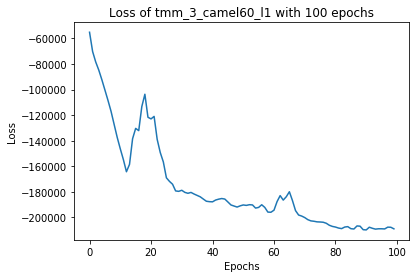

In [24]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device=device)
loss= plot_loss_epoch(model, path_save,data, epoch_init)
#loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


### Reconstruction image

In [27]:
# #* Reconstruction
# y_ = model.reconstruction(x,y)
# y_ = model.sample(x,y).cpu()
y_ = y_.cpu()
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

camel60: TMM_3 with  5346 parameters 
 after 100 has an error rate of 0.036228754350753234
 folder tmm_3_camel60_l1


## SVRNN

In [8]:
# Dimension of latent variables
z_dim = 1
h_dim = 14 # This value is not necessary for the TMM model
num_neurons = 22 #? == h_dim?
add_loss = True
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = "_l{}_11".format(int(add_loss))# '_1'# '_1' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
model = SVRNN_2(x_dim, z_dim, h_dim, y_dim, num_neurons, device, add_loss)

### Execution

In [9]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


SVRNN_2 has 5240 parameters to train
z_dim = 1, num_neurons = 22, h_dim = 14
Actual path to save our models for svrnn_2_camel60_l1_11 is 
 C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_camel60_l1_11 


In [10]:
#* Training
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_camel60_l1_11\svrnn_2


C:\Users\katyt\Google Drive\PhD\Simulations_semi_super\utils\training.py:67: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: -7145.677734 	 Loss Unlabeled: -38804.441406
Loss Labeled: -8489.662109 	 Loss Unlabeled: -40698.761719
Loss Labeled: -9511.775391 	 Loss Unlabeled: -42159.472656
Loss Labeled: -10544.863281 	 Loss Unlabeled: -43612.050781
Loss Labeled: -11712.773438 	 Loss Unlabeled: -45319.507812
Loss Labeled: -12994.621094 	 Loss Unlabeled: -47140.277344
Loss Labeled: -14339.095703 	 Loss Unlabeled: -49039.605469
Loss Labeled: -15799.787109 	 Loss Unlabeled: -51101.628906
Loss Labeled: -17370.109375 	 Loss Unlabeled: -53368.496094
Loss Labeled: -19027.867188 	 Loss Unlabeled: -55790.644531
Loss Labeled: -20691.699219 	 Loss Unlabeled: -58172.089844
Loss Labeled: -21941.814453 	 Loss Unlabeled: -60031.316406
Loss Labeled: -22312.707031 	 Loss Unlabeled: -60597.359375
Loss Labeled: -22060.044922 	 Loss Unlabeled: -60341.753906
Loss Labeled: -22363.433594 	 Loss Unlabeled: -60937.675781
Loss Labeled: -24162.894531 	 Loss Unlabeled: -63463.808594
Loss Labeled: -26816.804688 	 Loss Unlabele

Actual  path for to initialize our models:  C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_camel60_l1_11
C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_camel60_l1_11\svrnn_2_state_100.pth
Initialization of the SVRNN_2 model  at epoch 100
loss: -187824.453125 and epoch: 100


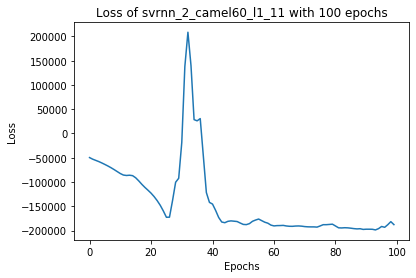

In [11]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device)
loss = plot_loss_epoch(model, path_save,data, epoch_init)
# # loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


In [13]:
# #* Reconstruction
y_ = model.reconstruction(x,y)
y_ = y_.cpu()
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

camel60: SVRNN_2 with  5240 parameters 
 after 100 has an error rate of 0.3896496532100302
 folder svrnn_2_camel60_l1_11


# Other Code
Creation missing labels and plots

In [ ]:
#-------------------------------
# Change the name to create or load the data and models

folder_data = r'C:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\Data\data_mlsp_semi'


x_list = []
y_list = []
# y_list_40 = []
# y_list_60 = []
# y_list_80 = []
# y_list_100 = []


for img in sorted(os.listdir(folder_data)):
    if img.startswith('x'):
        x_list.append(plt.imread(os.path.join(folder_data, img)))
    if img.startswith('y') and not img.endswith('npy'):
        y = plt.imread(os.path.join(folder_data, img))
        y_list.append(y)
        # Only if we want to create the missing labels for different probabilities
#         for p in probabilities:
#             if p == 0.4:
#                 y_list_40.append(create_missing_labels(y, p))
#             elif p == 0.6:
#                 y_list_60.append(create_missing_labels(y, p))
#             elif p == 0.8:
#                 y_list_80.append(create_missing_labels(y, p))
#             elif p == 1:
#                 y_list_100.append(create_missing_labels(y, p))
        
# np.save(os.path.join(general_path, folder_data, 'y_miss_40.npy'), y_list_40)
# np.save(os.path.join(general_path, folder_data, 'y_miss_60.npy'), y_list_60)
# np.save(os.path.join(general_path, folder_data, 'y_miss_80.npy'), y_list_80)
# np.save(os.path.join(general_path, folder_data, 'y_miss_100.npy'), y_list_100)

# Load the created data 
y_list_40 = np.load(os.path.join(general_path, folder_data, 'y_miss_40.npy'))
y_list_60 = np.load(os.path.join(general_path, folder_data, 'y_miss_60.npy'))
y_list_80 = np.load(os.path.join(general_path, folder_data, 'y_miss_80.npy'))
y_list_100 = np.load(os.path.join(general_path, folder_data, 'y_miss_100.npy'))

In [ ]:

fig = plt.figure(figsize=(20, 30))  
rows = len(x_list)
columns = 6
m, n = x_list[0].shape


for i, (x,y, y1,y2,y3, y4) in enumerate(zip(x_list, y_list, y_list_40, y_list_60, y_list_80, y_list_100)):
    print(x.shape)
    fig.add_subplot(rows, columns, columns*i+1)
    x[m-1, n-1] = -1
    plt.imshow(x, cmap='gray')
    plt.title('Image  idex {}'.format(i))
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+2)
    y[m-1, n-1] = -1
    plt.imshow(y, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+3)
    plt.imshow(y1, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+4)
    plt.imshow(y2, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+5)
    plt.imshow(y3, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+6)
    plt.imshow(y4, cmap='gray')



In [ ]:
print('{} has {} parameters to train'.format(model.__class__.__name__ ,num_param(model)) )

In [ ]:
y_ = model.sample(x,y)
image_complete = y_.clone().detach().numpy().reshape(m,n)
image_complete[m-1,n-1] = -1
image_labeled = y_list[idx].copy()
image_labeled[m-1,n-1] = -1
plt.imshow(x_list[idx])
plt.show()
plt.imshow(image_complete)
plt.show()
plt.imshow(image_labeled)
plt.show()
plt.imshow(y_list_80[idx])
plt.show()


unique, counts = np.unique(y_true, return_counts=True)
print(unique, counts)
unique, counts = np.unique(y_pred, return_counts=True)
print(unique, counts)